# Pandas

*Note: Most of the contents in this tutorial are adapted from the book Python for Data Analysis by Wes McKinney (the main author of pandas)*

### A bit background about pandas

Wes Mckinney started to build pandas in early 2008 when he was working for a quantitative investment management firm. He wanted to build a data analysis tool for some general purposed language that can do the following jobs:  
1. Data structures with labeled axes supporting automatic or explicit data alignment. This prevents commmon errors resulting from misaligned data and working with differently-indexed data coming from different sources
2. Integrated time series functionality
3. The same data structures handle both time series data and non-time series data
4. Arithmetic operations and reductions (like summing across an axis) would pass on the metadata (axis labels)
5. Flexible handling of missing data
6. Merge and other relational operations found in popular databases (SQL-based, for example)

Later, we will be able to see most of these features implemented in pandas.

In [18]:
import pandas as pd
import numpy as np

### DataFrame

A DataFrame represents a tabular, spreadsheet-like data structure containing an ordered collection of columns, each of which can be a different value type. The DataFrame has both a row and column index. Compared with other such DataFrame-like structures (like R's `data.frame`), row-oriented and column-oriented operations in DataFrame are treated roughly symmetrically. 

There are many ways to create a DataFrame. One of the most common one is from a dict of equal-length lists or NumPy arrays:

In [31]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'], 
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
frame = pd.DataFrame(data)
#frame?

In [20]:
x = np.zeros((3, 3))
x

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [21]:
frame

pop   state  year
0  1.5    Ohio  2000
1  1.7    Ohio  2001
2  3.6    Ohio  2002
3  2.4  Nevada  2001
4  2.9  Nevada  2002

Rows or columns may be selected from the data frame in various ways.

In [22]:
frame.year

0    2000
1    2001
2    2002
3    2001
4    2002
Name: year, dtype: int64

In [24]:
frame['state']

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
Name: state, dtype: object

In [25]:
frame.drop(columns=['state', 'year'])

pop
0  1.5
1  1.7
2  3.6
3  2.4
4  2.9

In [28]:
# What happens if you try to select two columns?
# Why?

frame[['state', 'year']]

frame.index = frame['year']
frame = frame.drop(columns=['year'])
print(frame)

      pop   state
year             
2000  1.5    Ohio
2001  1.7    Ohio
2002  3.6    Ohio
2001  2.4  Nevada
2002  2.9  Nevada


In [33]:
frame.iloc[2:4]

pop   state  year
2  3.6    Ohio  2002
3  2.4  Nevada  2001

In [34]:
# Pandas has excellent documentation found at http://pandas.pydata.org/pandas-docs/stable/
#
# Using the documentation or google, figure out how to add a column to frame.
# Add a column called debt that has entries 3.5, 2.7, 1.5, 8.3, 6.4.
frame['debt'] = [3.5,2.7,1.5,8.3,6.4]
frame['debt multiplied'] = frame['debt'] * 8/2

frame

pop   state  year  debt  debt multiplied
0  1.5    Ohio  2000   3.5             14.0
1  1.7    Ohio  2001   2.7             10.8
2  3.6    Ohio  2002   1.5              6.0
3  2.4  Nevada  2001   8.3             33.2
4  2.9  Nevada  2002   6.4             25.6

### Read data from a csv file

One reason python is a useful language for data science are its tools for reading and writing data.
Pandas takes those tools and makes them even simpler.
This makes it an ideal library for reading, manipulating, and writing data.

*Before moving forward, please make sure that you have downloaded Titanic dataset. Go [here](https://www.kaggle.com/c/titanic/data), download train.csv and put it in the same folder as you run this tutorial.*

In [165]:
# Put the data you downloaded from the above link in the same folder as this tutorial.
# read data from a csv file
titanic_df = pd.read_csv('train.csv')

In [114]:
# Let's take a look at the data.
titanic_df.head()
#print(len(titanic_df))

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [115]:
import matplotlib.pyplot as plt

%matplotlib inline

891   <class 'pandas.core.series.Series'>


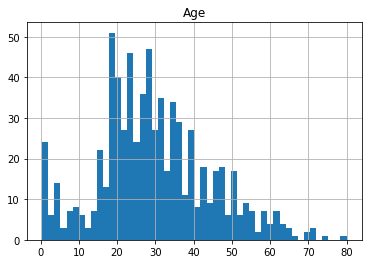

In [128]:
print(len(titanic_df['Age']), " ", type(titanic_df['Age']))
titanic_df.hist(['Age'], bins=50)
plt.show()

342   <class 'pandas.core.series.Series'>


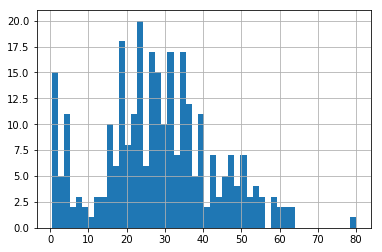

In [135]:
#fig = plt.figure(figsize=(5,5))

survivedIndex = titanic_df['Survived'] == 1 
t = titanic_df.loc[survivedIndex, 'Age']
t.head()
print(len(t), " ", type(t))

#plt.hist(titanic_df['Age'], titanic_df.loc[survivedIndex, 'Survived'])
t.hist( bins=50)

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000083F5031470>]], dtype=object)

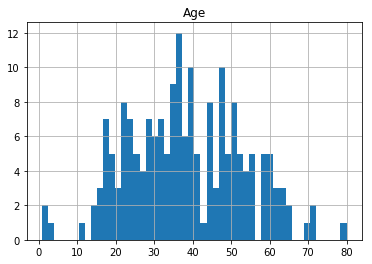

In [151]:
firstClass = titanic_df['Pclass'] == 1

firstClassPassengers = titanic_df.loc[firstClass]

firstClassPassengers.hist(['Age'], bins=50)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [109]:
print(t.describe(), "\n\n\n", titanic_df.describe())

       PassengerId  Survived      Pclass         Age       SibSp       Parch  \
count   891.000000     891.0  891.000000  714.000000  891.000000  891.000000   
mean    446.000000       1.0    2.308642   29.699118    0.523008    0.381594   
std     257.353842       0.0    0.836071   14.526497    1.102743    0.806057   
min       1.000000       1.0    1.000000    0.420000    0.000000    0.000000   
25%     223.500000       1.0    2.000000   20.125000    0.000000    0.000000   
50%     446.000000       1.0    3.000000   28.000000    0.000000    0.000000   
75%     668.500000       1.0    3.000000   38.000000    1.000000    0.000000   
max     891.000000       1.0    3.000000   80.000000    8.000000    6.000000   

             Fare  
count  891.000000  
mean    32.204208  
std     49.693429  
min      0.000000  
25%      7.910400  
50%     14.454200  
75%     31.000000  
max    512.329200   


        PassengerId  Survived      Pclass         Age       SibSp       Parch  \
count   891.000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000083F0479710>]], dtype=object)

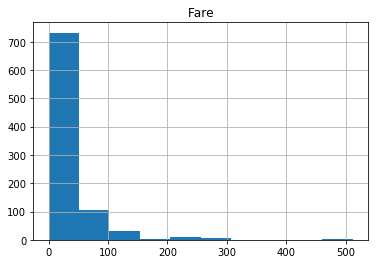

In [78]:
titanic_df.hist(['Fare'])

In [37]:
titanic_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

## Working on Columns

Selecting rows is useful, but you'll find that most of your work in data science will revolve around columns.
Pandas has tools for transforming and summarizing columns.

In [42]:
titanic_df['Age'].mean()

29.69911764705882

In [46]:
titanic_df['Age'].max()

80.0

In [47]:
titanic_df['Fare'].max()

512.32920000000001

In [48]:
titanic_df['Fare'].min()

0.0

In [49]:
titanic_df['Fare'].median()

14.4542

In [50]:
titanic_df['Survived'].sum()

342

You can also pass columns from a data frame to function in the same way that you would pass in an array.

In [52]:
pctSurvived= titanic_df['Survived'].sum() / len(titanic_df['Survived'])
pctSurvived

0.38383838383838381

In [89]:
t = (titanic_df['Age'] > 25) & (titanic_df['Age'] < 50)
print(t[2])
ageGroup1 = titanic_df[t]
ageGroup1

True


PassengerId  Survived  Pclass  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
8              9         1       3   
13            14         0       3   
18            19         0       3   
20            21         0       2   
21            22         1       2   
23            24         1       1   
25            26         1       3   
30            31         0       1   
34            35         0       1   
35            36         0       1   
40            41         0       3   
41            42         0       2   
52            53         1       1   
53            54         1       2   
57            58         0       3   
61            62         1       1   
62            63         0       1   
66            67         1       2   
69            70         0       3   
70            71         0       2   
73            74         0       3   
74            75         1       3   
79            80         1       3   
81            82         1       3   
83            84         0       1   
85            86         1       3   
..           ...       ...     ...   
817          818         0       2   
818          819         0       3   
821          822         1       3   
822          823         0       1   
823          824         1       3   
835          836         1       1   
838          839         1       3   
842          843         1       1   
843          844         0       3   
845          846         0       3   
847          848         0       3   
848          849         0       2   
854          855         0       2   
856          857         1       1   
860          861         0       3   
862          863         1       1   
865          866         1       2   
866          867         1       2   
867          868         0       1   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
881          882         0       3   
883          884         0       2   
885          886         0       3   
886          887         0       2   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
1    CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...  female  38.0      1   
2                               HEIKKINEN, MISS. LAINA  female  26.0      0   
3         FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)  female  35.0      1   
4                             ALLEN, MR. WILLIAM HENRY    male  35.0      0   
8    JOHNSON, MRS. OSCAR W (ELISABETH VILHELMINA BERG)  female  27.0      0   
13                         ANDERSSON, MR. ANDERS JOHAN    male  39.0      1   
18   VANDER PLANKE, MRS. JULIUS (EMELIA MARIA VANDE...  female  31.0      1   
20                                FYNNEY, MR. JOSEPH J    male  35.0      0   
21                               BEESLEY, MR. LAWRENCE    male  34.0      0   
23                        SLOPER, MR. WILLIAM THOMPSON    male  28.0      0   
25   ASPLUND, MRS. CARL OSCAR (SELMA AUGUSTA EMILIA...  female  38.0      1   
30                            URUCHURTU, DON. MANUEL E    male  40.0      0   
34                             MEYER, MR. EDGAR JOSEPH    male  28.0      1   
35                      HOLVERSON, MR. ALEXANDER OSKAR    male  42.0      1   
40      AHLIN, MRS. JOHAN (JOHANNA PERSDOTTER LARSSON)  female  40.0      1   
41   TURPIN, MRS. WILLIAM JOHN ROBERT (DOROTHY ANN ...  female  27.0      1   
52            HARPER, MRS. HENRY SLEEPER (MYNA HAXTUN)  female  49.0      1   
53   FAUNTHORPE, MRS. LIZZIE (ELIZABETH ANNE WILKIN...  female  29.0      1   
57                                 NOVEL, MR. MANSOUER    male  28.5      0   
61                                 ICARD, MISS. AMELIE  female  38.0

In [90]:
import numpy as np
np.mean(titanic_df['Age'])

29.69911764705882

Finally, we can apply any user-defined function to a column entry wise.  For example, if I wanted all of the names of the passengers to be upper case, I could do the following:

In [91]:
# Once you understand this cell, edit it so that the changes made by the function are saved in the data frame.
def to_upper_case(s):
    return s.upper()

titanic_df['Name'] = titanic_df['Name'].apply(to_upper_case)

In [92]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            BRAUND, MR. OWEN HARRIS    male  22.0      1   
1  CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...  female  38.0      1   
2                             HEIKKINEN, MISS. LAINA  female  26.0      0   
3       FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)  female  35.0      1   
4                           ALLEN, MR. WILLIAM HENRY    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [93]:
# As you can see, there are several ways to manipulate and summarize pandas data frames.
# Can you repeat the outcome of the previous cell without using the apply() method?

## Masking

A boolean mask is a vector of True or False values.  Specifically, if we have a vector $x$ and a condition that can be applied to every entry, the boolean mask is the vector whose entries correspond to the truth value of the condition applied entry-wise to $x$.

Confusing?  Let's look at an example.  It will make sense.

In [94]:
import numpy as np

In [95]:
x = np.random.random(10)
print(x)

[ 0.32120349  0.81912646  0.70846701  0.64711961  0.50754186  0.01733933
  0.40758899  0.30272727  0.24497607  0.0968183 ]


In [96]:
mask = x > 0.5
print(mask)

[False  True  True  True  True False False False False False]


In [97]:
# Exercise: Produce a list of numbers ascending from 0 to 15.
# Create a mask whose entry is True if the corresponding entry in the list of numbers
# is even, and False otherwise.
#
# If you aren't sure how to do this, check out the python documentation for the range command.


Masking can be combined with Pandas to great effect.  For example:

In [98]:
mask = titanic_df['Age'] < 18
len(titanic_df[mask])

113

If you couldn't tell, if you give the data frame a mask it will return the rows that correspond to the "True" values in the mask.  This is especially useful for selecting populations out of a large data set that may be of interest.

# Machine Learning and Pandas

## Data Cleaning

Data will always come to you in terrible condition.  Make peace with this now.  Pandas has tools for dealing with missing data efficiently.

Did you notice the age column when we described the data frame previously?  Let's take another look:

In [166]:
titanic_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

While this isn't a problem necessarily, what happens if we want to do a numerical operation to the Age column?  Should we just remove the rows that have NaN as their age?  Why or why not?

Pandas can quickly fill in bad values with the fillna() method:

In [167]:
titanic_df.fillna(1, inplace=True)
titanic_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   1.0      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   1.0      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   1.0

In [168]:
titanic_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   23.997946    0.523008   
std     257.353842    0.486592    0.836071   17.329598    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000    6.000000    0.000000   
50%     446.000000    0.000000    3.000000   24.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [101]:
# Now that that is done, let's do some machine learning!
from sklearn.cross_validation import train_test_split

Xdata = titanic_df.drop(['Survived', 'Name', 'Sex', 'Cabin', 'Embarked', 'Ticket'], axis=1).copy()
Ydata = titanic_df['Survived'].copy()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [102]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xdata, Ydata)

In [103]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(Xtrain, Ytrain)
yhat = rfc.predict_proba(Xtest)

In [152]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Ytest, yhat[:,1])

NameError: name 'Ytest' is not defined